In [ ]:
import kagglehub
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import tqdm
from collections import Counter

In [ ]:
data_path = kagglehub.dataset_download('omkargurav/face-mask-dataset')
data_path = os.path.join(data_path, 'data')
print('path to dataset:',data_path)

path to dataset: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data


In [ ]:
labels=['with_mask', 'without_mask']

img_arr = []
img_label = []

for label in labels:
  path = os.path.join(data_path, label)

  for img_name in tqdm.tqdm(os.listdir(path)):
    img_path = os.path.join(path, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img,(128,128))
    img_arr.append(img)
    img_label.append(label)

100%|██████████| 3828/3828 [00:04<00:00, 857.88it/s] 


In [ ]:
img_arr = np.array(img_arr)
img_label = np.array(img_label)

img_arr.shape

(7553, 128, 128, 3)

with_mask



array([[[214, 197, 200],
        [214, 197, 200],
        [214, 197, 200],
        ...,
        [220, 209, 205],
        [221, 210, 206],
        [221, 210, 208]],

       [[214, 197, 200],
        [214, 197, 200],
        [214, 197, 200],
        ...,
        [220, 209, 205],
        [221, 210, 206],
        [222, 210, 208]],

       [[214, 197, 200],
        [214, 197, 200],
        [214, 197, 200],
        ...,
        [220, 208, 206],
        [221, 209, 207],
        [221, 210, 209]],

       ...,

       [[219, 204, 201],
        [219, 204, 201],
        [219, 204, 202],
        ...,
        [223, 208, 206],
        [223, 208, 206],
        [222, 207, 205]],

       [[219, 204, 201],
        [219, 204, 201],
        [219, 204, 202],
        ...,
        [223, 208, 206],
        [223, 208, 206],
        [222, 207, 205]],

       [[219, 204, 201],
        [219, 204, 201],
        [219, 204, 202],
        ...,
        [223, 208, 206],
        [222, 207, 205],
        [222, 207, 205]]], dtype=uint8)
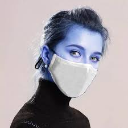

In [ ]:
print(img_label[0])
print()
img_arr[0]

without_mask



array([[[254, 254, 254],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [254, 254, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [252, 252, 252],
        ...,
        [250, 249, 251],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [250, 250, 250],
        [251, 251, 251],
        ...,
        [248, 247, 249],
        [253, 253, 253],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [250, 250, 250],
        [245, 245, 245],
        ...,
        [241, 246, 247],
        [253, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [250, 250, 250],
        ...,
        [244, 252, 251],
        [253, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [252, 255, 254],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
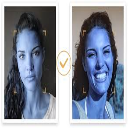

In [ ]:
print(img_label[4000])
print()
img_arr[4000]

In [ ]:
label_counts = Counter(img_label)
for label, count in label_counts.items():
  print(f'{label} : {count} images')

with_mask : 3725 images
without_mask : 3828 images


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
img_label_encode = le.fit_transform(img_label)

img_label_encoded = to_categorical(img_label_encode)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_arr, img_label_encoded, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras

n = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (128,128,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(n, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,708,770 (14.15 MB)

 Trainable params: 3,708,386 (14.15 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                 factor = 0.1,
                                                 patience = 2,
                                                 min_lr = 1e-6)

In [ ]:
early_Stopper = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 3,
                                              restore_best_weights = True)

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [lr_scheduler, early_Stopper])

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.8317 - loss: 0.4191 - val_accuracy: 0.5967 - val_loss: 0.6473 - learning_rate: 0.0010
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9168 - loss: 0.2240 - val_accuracy: 0.6942 - val_loss: 0.6203 - learning_rate: 0.0010
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.9462 - loss: 0.1537 - val_accuracy: 0.8364 - val_loss: 0.3894 - learning_rate: 0.0010
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9597 - loss: 0.1154 - val_accuracy: 0.9223 - val_loss: 0.2303 - learning_rate: 0.0010
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9661 - loss: 0.0990 - val_accuracy: 0.9008 - val_loss: 0.3021 - learning_rate: 0.0010
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9754 - loss: 0.0736 - val_accuracy: 0.9421 - val_loss: 0.1709 - learning_rate: 0.0010
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9782 - loss: 0.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {accuracy*100:.3f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.9344 - loss: 0.2063
Test Accuracy: 93.845
